# 绘图和可视化

## matplotlib API入门

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

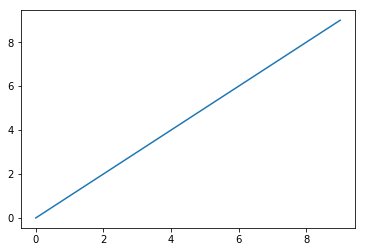

In [3]:
plt.plot(data)

### Figure和Subplot

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
ax2 = fig.add_subplot(2, 2, 2)

In [7]:
ax3 = fig.add_subplot(2, 2, 3)

In [8]:
ax1
ax2
ax3

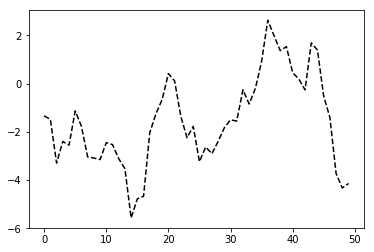

In [9]:
plt.plot(np.random.randn(50).cumsum(), 'k--')#k--是一个线型选项

In [16]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)


In [12]:
print(ax2.scatter(np.arange(30), np.arange(30) + 3 *
           np.random.randn(30)))

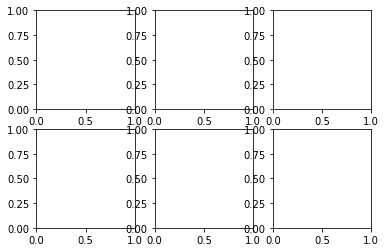

In [18]:
fig, axes = plt.subplots(2, 3)

In [19]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE83579668>,
      dtype=object)

### 调整subplot周围的间距

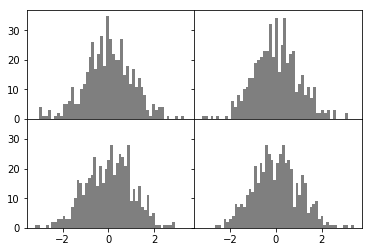

In [21]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k',
                       alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 颜色、标记和线型

In [22]:
from numpy.random import randn

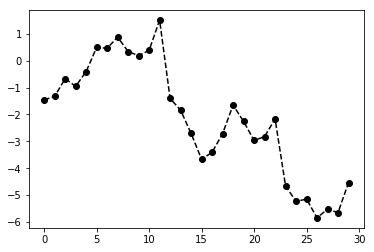

In [23]:
plt.plot(randn(30).cumsum(),'ko--')

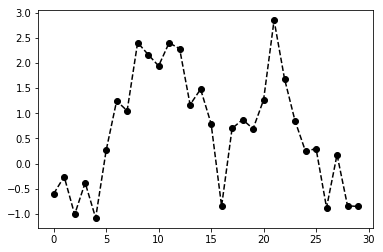

In [25]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [26]:
data = np.random.randn(30).cumsum()

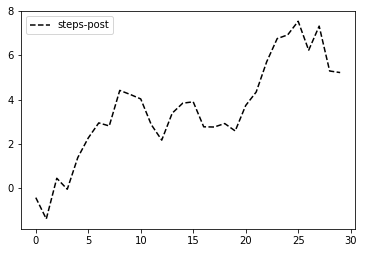

In [31]:
plt.plot(data, 'k--', label='steps-post')
plt.legend(loc='best')

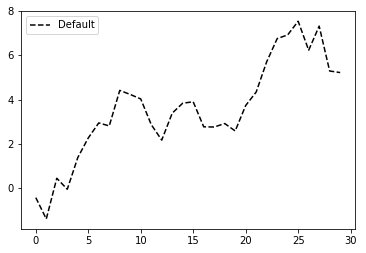

In [30]:
plt.plot(data, 'k--', label='Default')
plt.legend(loc='best')

### 刻度、标签和图例
#### xlim（图表的范围）、xticks（刻度的位置）、xticklabels（刻度标签）

### 设置标题、轴标签、刻度以及刻度标签

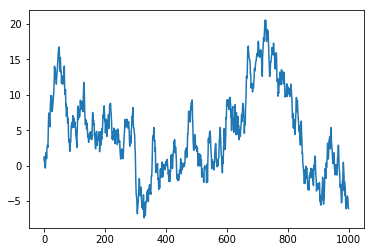

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

In [34]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')#rotation=30设置x刻度标签倾斜30度

In [35]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [36]:
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

In [39]:
ax.plot(np.random.randn(1000).cumsum())

### 添加图例

In [40]:
from numpy.random import randn

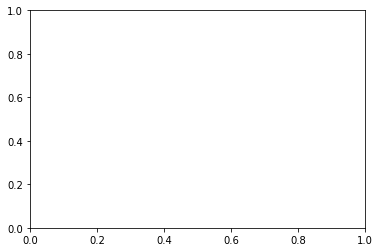

In [41]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [42]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [43]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [44]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [45]:
ax.legend(loc='best')

### 注解以及在Subplot上绘图

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

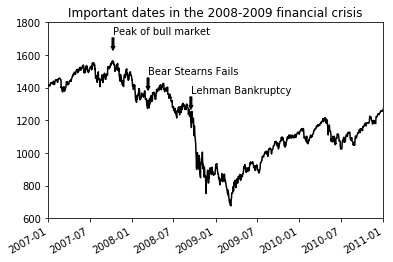

In [48]:
import pandas as pd
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4,
                              width=2,
                              headlength=4),
               horizontalalignment='left', verticalalignment='top')
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

### 将图表保存到文件
#### plt.saveig('figpath.svg)

## 使用pandas和seaborn绘图

### 线型图

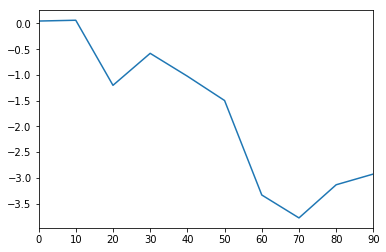

In [49]:
s = pd.Series(np.random.randn(10).cumsum(),
             index=np.arange(0, 100, 10))
s.plot()

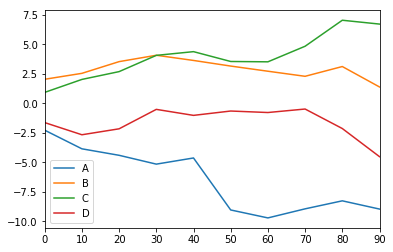

In [50]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B','C','D'],
                 index=np.arange(0, 100,10))
df.plot()

### 柱状图

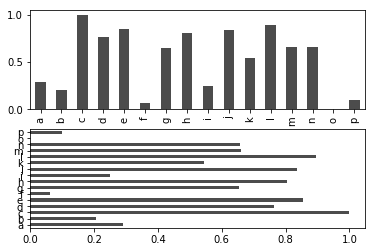

In [51]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16),
                index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [56]:
df= pd.DataFrame(np.random.rand(6, 4),
               index=['one', 'two','three','four','five','six'],
               columns=pd.Index(['A','B','C','D'],
                               name='Genus'))
df

Genus,A,B,C,D
one,0.409423,0.087507,0.366317,0.728251
two,0.452305,0.974066,0.266615,0.937975
three,0.636078,0.163091,0.807825,0.791847
four,0.206663,0.344341,0.892322,0.151598
five,0.195297,0.237865,0.678013,0.506033
six,0.450685,0.344216,0.078498,0.914537


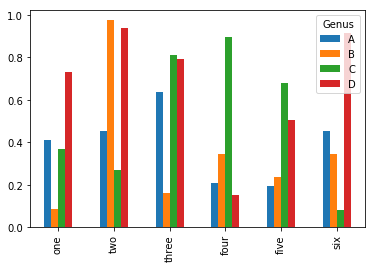

In [57]:
df.plot.bar()

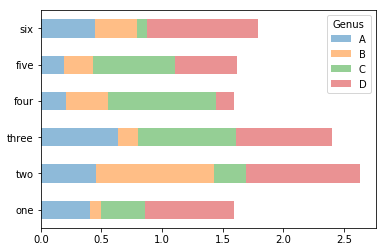

In [58]:
df.plot.barh(stacked=True, alpha=0.5)

In [59]:
tips = pd.read_csv('examples/tips.csv')

In [60]:
party_counts = pd.crosstab(tips['day'], tips['size']
                          )
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [61]:
party_counts = party_counts.loc[:, 2:5]

In [62]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


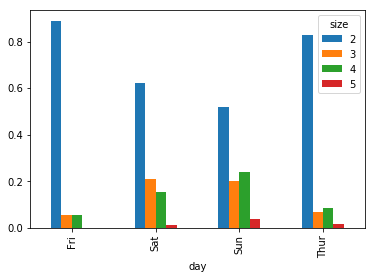

In [63]:
party_pcts.plot.bar()

In [64]:
import seaborn as sns

In [65]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


D:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


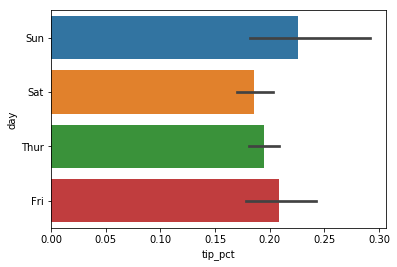

In [66]:
sns.barplot(x='tip_pct' , y='day', data =tips, orient='h')

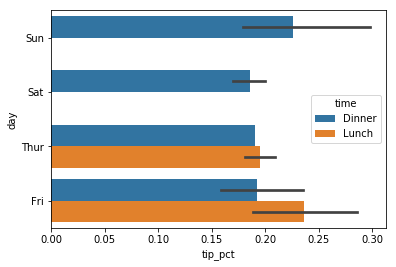

In [67]:
sns.barplot(x='tip_pct' , y='day', data =tips, hue='time',orient='h')

### 直方图和密度图

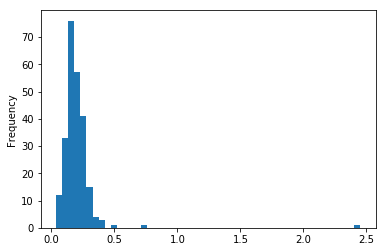

In [68]:
tips['tip_pct'].plot.hist(bins=50)

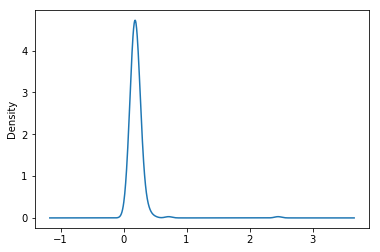

In [69]:
tips['tip_pct'].plot.density()

D:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


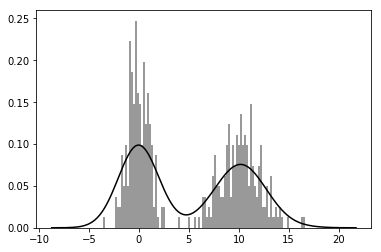

In [71]:
comp1 = np.random.normal(0,1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values, bins=100, color='k')

### 散点图或点图

In [73]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

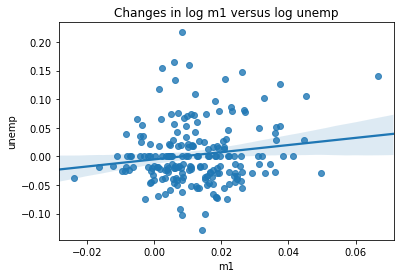

In [77]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' %('m1', 'unemp'))

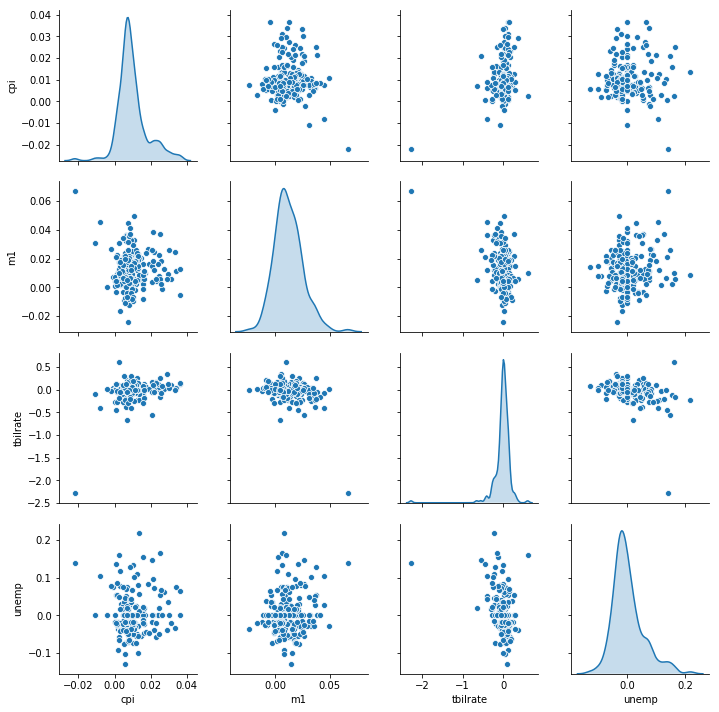

In [78]:
sns.pairplot(trans_data, diag_kind='kde')
plot_kws={'alpha' : 0.2}

### 分面网格和类型数据

D:\python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


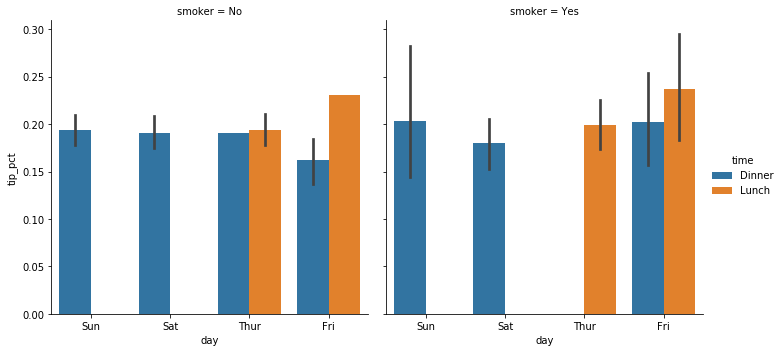

In [79]:
sns.factorplot(x='day', y='tip_pct', hue='time',col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

D:\python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


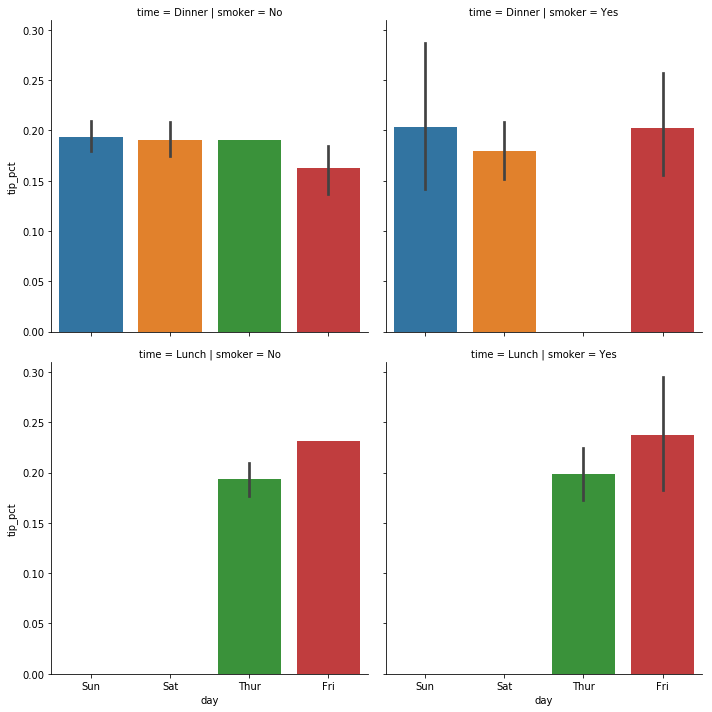

In [80]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',kind='bar',data=tips[tips.tip_pct < 1])

D:\python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


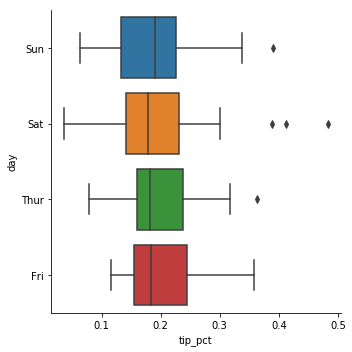

In [82]:
sns.factorplot(x='tip_pct', y='day', kind='box',data=tips[tips.tip_pct < 0.5])